
Our business objective is to assist local businesses, such as coffee houses and restaurants, in identifying the right customers for their promotions while minimizing promotional costs to maximize revenue and profits.

In the context of machine learning, our primary evaluation metric is F1-Score. We prioritize higher precision to optimize marketing costs and, to some extent, avoid negatively impacting customer experience. We also aim for higher recall to capture as many potential customers as possible.

Additionally, we will use AUC (Area Under the ROC Curve) as a secondary metric to assess the model's ability to discriminate between the two classes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, roc_auc_score, plot_roc_curve,accuracy_score
from scipy.stats import chi2_contingency




In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("Data (2).csv")

In [4]:
data.sample(5
           )

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
6719,No Urgent Place,Kid(s),Sunny,80,Coffee House,2h,Female,31,Married partner,1,Associates degree,Unemployed,$37500 - $49999,NaN,never,1~3,1~3,1~3,1~3,1,0,0,0,1,0
10990,Work,Alone,Snowy,30,Bar,1d,Male,21,Single,0,Some college - no degree,Student,$100000 or More,NaN,less1,1~3,1~3,less1,less1,1,1,1,0,1,1
12091,No Urgent Place,Alone,Rainy,55,Bar,1d,Female,21,Unmarried partner,0,Some college - no degree,Office & Administrative Support,$25000 - $37499,NaN,never,never,1~3,never,never,1,1,0,0,1,1
5078,Work,Alone,Sunny,80,Coffee House,2h,Male,36,Married partner,0,Some college - no degree,Healthcare Practitioners & Technical,$25000 - $37499,NaN,never,gt8,4~8,less1,less1,1,0,0,1,0,1
8096,Home,Alone,Sunny,80,Bar,2h,Female,50plus,Married partner,1,Some college - no degree,Education&Training&Library,$50000 - $62499,NaN,less1,never,4~8,1~3,less1,1,0,0,1,0,0


In [5]:
df = {'col':[], 'unique':[]}
for col in data.columns:
    df['col'].append(col)
    df['unique'].append(data[col].unique())
    
df = pd.DataFrame(df)

df

,col,unique
0,destination,"[No Urgent Place, Home, Work]"
1,passanger,"[Alone, Friend(s), Kid(s), Partner]"
2,weather,"[Sunny, Rainy, Snowy]"
3,temperature,"[55, 80, 30]"
4,coupon,"[Restaurant(<20), Coffee House, Carry out & Ta..."
5,expiration,"[1d, 2h]"
6,gender,"[Female, Male]"
7,age,"[21, 46, 26, 31, 41, 50plus, 36, below21]"
8,maritalStatus,"[Unmarried partner, Single, Married partner, D..."
9,has_children,"[1, 0]"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

We have 25 columns and 12684 records. Car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 , Restaurant20To50 have null values

In [7]:
data.shape

(12684, 25)

In [8]:
data.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1%,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
5%,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
10%,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
data.rename(columns={'Accept(Y/N?)': 'target'}, inplace = True)

The number of users that accepted the coupon is 7210 , 56.843 %
The number of users that rejected the coupon is 5474 , 43.157 %


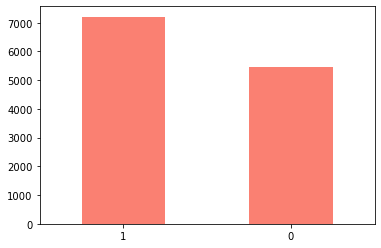

In [10]:
y_count = data['target'].value_counts()
print('The number of users that accepted the coupon is', y_count[1],',',round(y_count[1]/data.shape[0]*100,3),'%')
print('The number of users that rejected the coupon is', y_count[0],',',round(y_count[0]/data.shape[0]*100,3),'%')  
data['target'].value_counts().plot(kind = 'bar', color=('Salmon'))
plt.xticks(rotation = 360)
plt.show()

Target column is imbalanced. However the imbalance is not severe so we can either oversample or use original data to see if it affects the performance 

In [11]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
target                      0
dtype: int64

In [12]:
missing_value= data.isnull().sum()*100/len(data)

missing_value_df = pd.DataFrame({'missing_count':data.isnull().sum(), 'missing_percentage' :missing_value,'Data_type' :data.dtypes})
missing_value_df[missing_value_df.missing_count!=0]

,missing_count,missing_percentage,Data_type
car,12576,99.148534,object
Bar,107,0.843582,object
CoffeeHouse,217,1.710817,object
CarryAway,151,1.190476,object
RestaurantLessThan20,130,1.024913,object
Restaurant20To50,189,1.490066,object


Feature 'car' has 99% of the missing value, drop this feature 

In [13]:

cols = ['CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50','Bar']
for i in cols:
    data[i] = data[i].fillna(data[i].value_counts().index[0])

In [14]:
data.CoffeeHouse.value_counts()

less1    3602
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [15]:
data = data.drop(columns=['car'],axis = 1)

In [16]:
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,target
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
target,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


<AxesSubplot:>

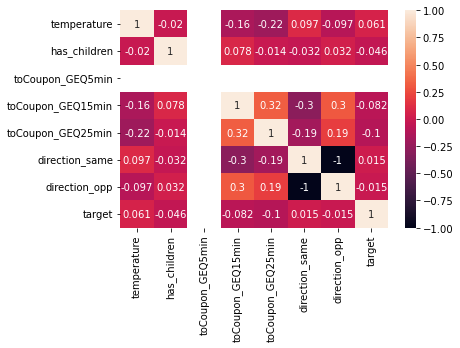

In [17]:
sns.heatmap(data.corr(),annot= True)

Feature ‘direction_same’ is perfectly correlated with ‘direction_opp’, both have the same variance.
‘toCoupon_GEQ5min’ feature has no correlation with any feature because it has the same value ‘1’ for all data points, which means all the restaurants/bars are at least more than five minutes away from the driver.
so, drop both 'direction_opp'.



In [18]:
contingency_table = pd.crosstab(data['direction_same'], data['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)



Chi-Square Statistic: 2.6215727200825305
P-value: 0.10541990881286277
Degrees of Freedom: 1
Expected Frequencies Table:
[[4298.41059603 5661.58940397]
 [1175.58940397 1548.41059603]]


In [19]:
df = pd.DataFrame(data['direction_same'].unique(), columns=['direction_same'])
df['Total'] = data.groupby('direction_same').target.count()
df['Accepted'] = data[data.target == 1].groupby('direction_same').target.count()
df['Rejected'] = data[data['target']==0].groupby('direction_same').target.count()
df['Acceptance%'] = df['Accepted']/df['Total']*100
df['Rejection%'] = df['Rejected']/df['Total']*100
df

,direction_same,Total,Accepted,Rejected,Acceptance%,Rejection%
0,0,9960,5624,4336,56.465863,43.534137
1,1,2724,1586,1138,58.223201,41.776799


The feature is imbalanced, with a large majority of values falling into one category ('0').

Even though there's an imbalance, the feature doesn't appear to be informative in predicting the target variable because both categories have similar acceptance ratios

In [20]:
data = data.drop(columns = ['direction_opp'], axis = 1)

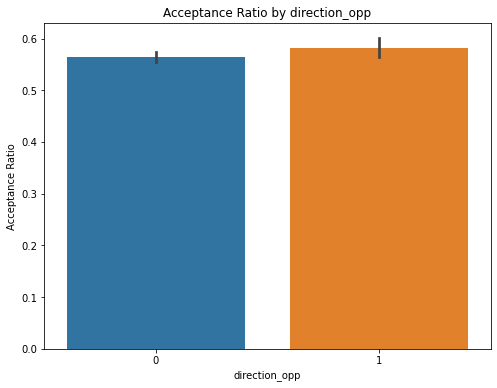

In [21]:
# Visualize the acceptance ratio for each 'direction_oppp' category
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='direction_same', y='target')
plt.title('Acceptance Ratio by direction_opp')
plt.xlabel('direction_opp')
plt.ylabel('Acceptance Ratio')
plt.show()


In [22]:
data.duplicated().sum()

291

In [23]:
duplicate = data[data.duplicated(keep = 'last')]

In [24]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 23 to 10707
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           291 non-null    object
 1   passanger             291 non-null    object
 2   weather               291 non-null    object
 3   temperature           291 non-null    int64 
 4   coupon                291 non-null    object
 5   expiration            291 non-null    object
 6   gender                291 non-null    object
 7   age                   291 non-null    object
 8   maritalStatus         291 non-null    object
 9   has_children          291 non-null    int64 
 10  education             291 non-null    object
 11  occupation            291 non-null    object
 12  income                291 non-null    object
 13  Bar                   291 non-null    object
 14  CoffeeHouse           291 non-null    object
 15  CarryAway             291 non-null   

In [25]:
data = data.drop_duplicates()

In [26]:
data.shape

(12393, 23)

In [27]:
numeric_cols = data.select_dtypes(include = 'number').columns.tolist()
numeric_cols
categorical_col = data.select_dtypes(include = 'object').columns.tolist()
categorical_col

['destination',
 'passanger',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50']

In [28]:


map_temp = {55: 'Mid', 80: 'High', 30: 'Low'}
map_bar = {'less1': 1, '1~3': 2, 'gt8': 4, '4~8': 3, 'never': 0}
map_CoffeeHouse = map_CarryAway = map_RestaurantLessThan20 = map_Restaurant20To50 = map_bar


cols = ['temperature', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


data[cols] = data[cols].replace({
    'temperature': map_temp,
    'Bar': map_bar,
    'CoffeeHouse': map_CoffeeHouse,
    'CarryAway': map_CarryAway,
    'RestaurantLessThan20': map_RestaurantLessThan20,
    'Restaurant20To50': map_Restaurant20To50
})




In [29]:


data.expiration.replace({'1d':'24h'},inplace=True)
data['age'] = np.where(data['age'] == '50plus', '51', data['age'])
data['age'] = np.where(data['age'] == 'below21', '20', data['age'])

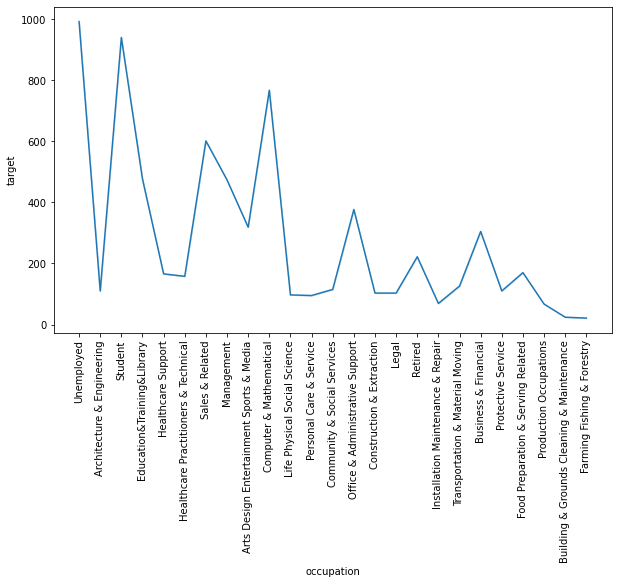

In [50]:
coupon_used_data = data[data['target'] == 1]

plt.figure(figsize=(10, 6))

# Create a line plot to visualize coupon usage by occupation
sns.lineplot(x='occupation', y='target', data=coupon_used_data, estimator='sum')
plt.xticks(rotation = 90)
plt.show()

We can see majority coupon are being used by Student and unemployed people even if they have low salary.

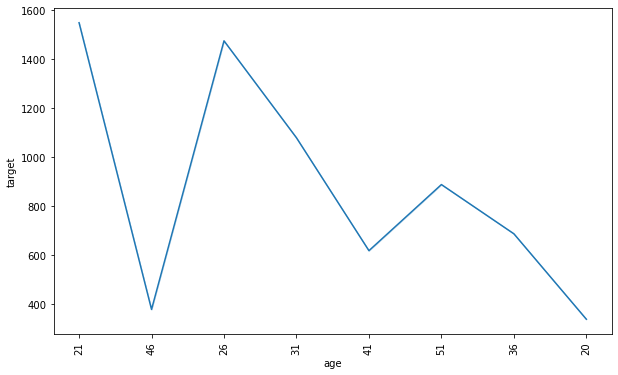

In [51]:
coupon_used_data = data[data['target'] == 1]

plt.figure(figsize=(10, 6))

# Create a line plot to visualize coupon usage by occupation
sns.lineplot(x='age', y='target', data=coupon_used_data, estimator='sum')
plt.xticks(rotation = 90)
plt.show()

We can see people between 21 to 31 are more likely to use the coupon

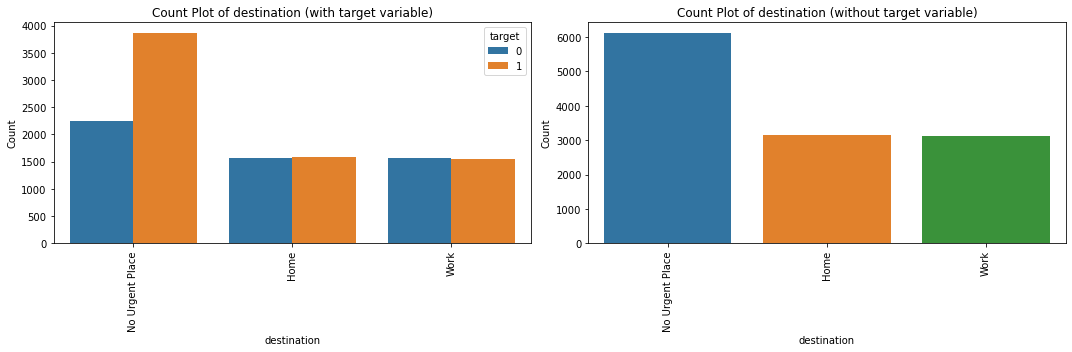

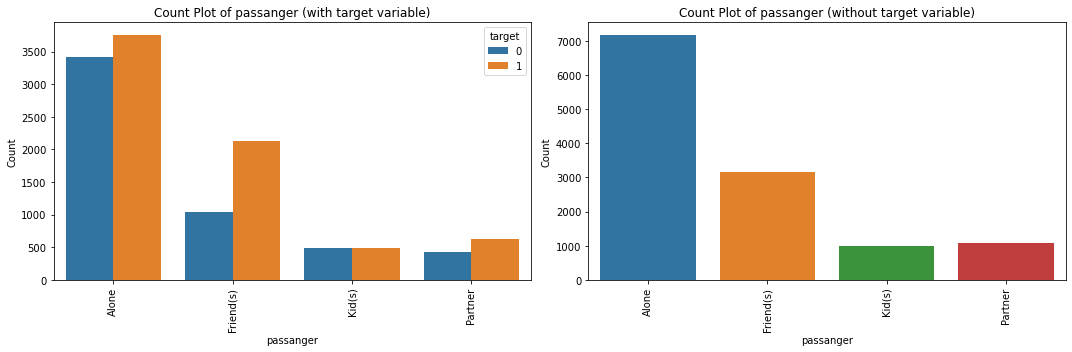

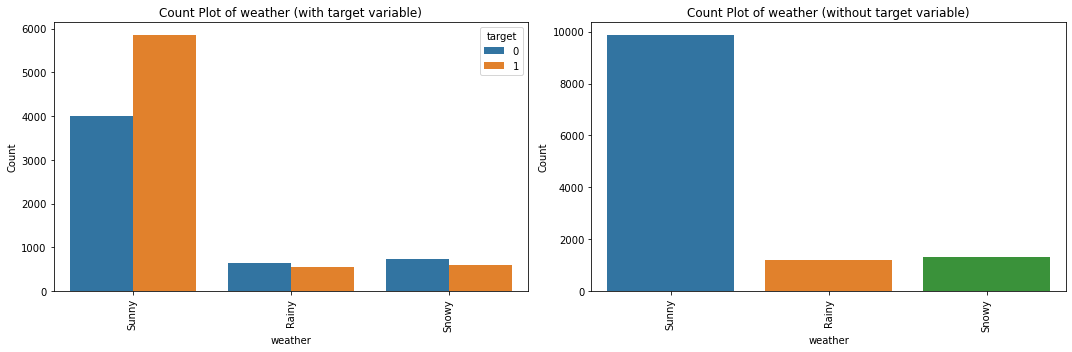

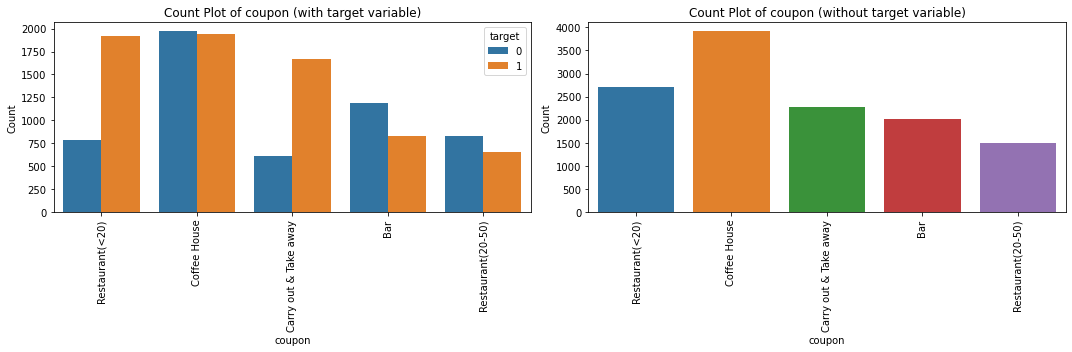

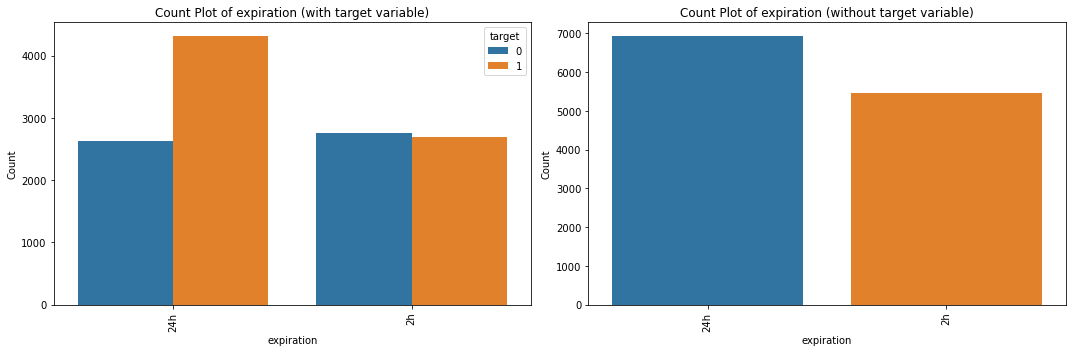

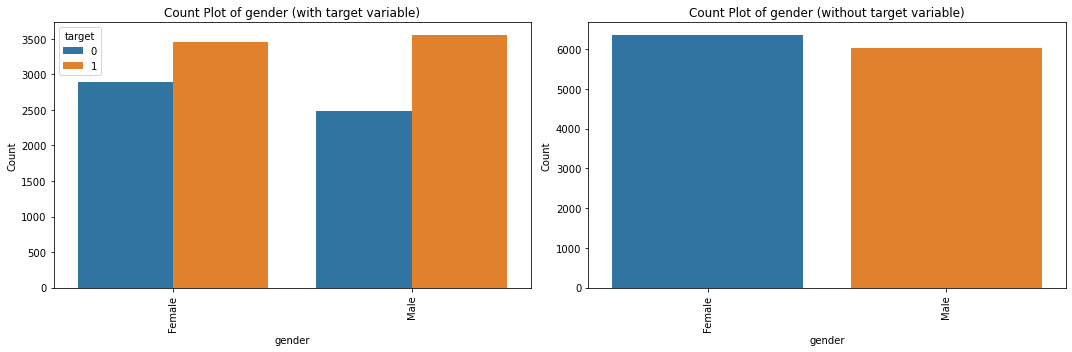

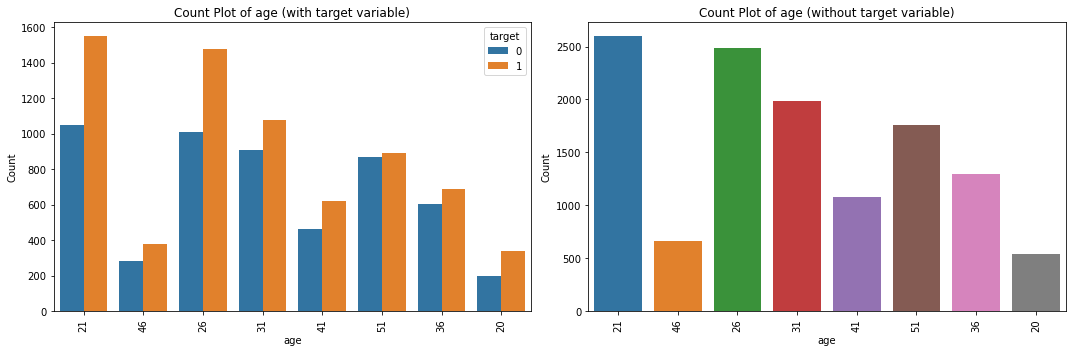

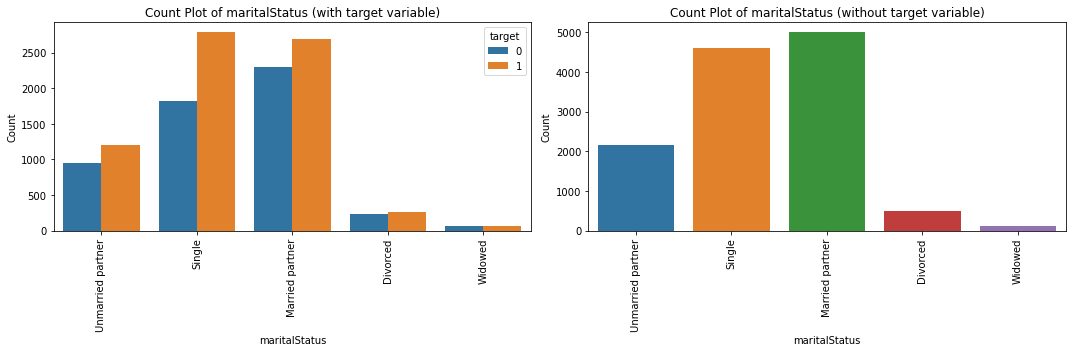

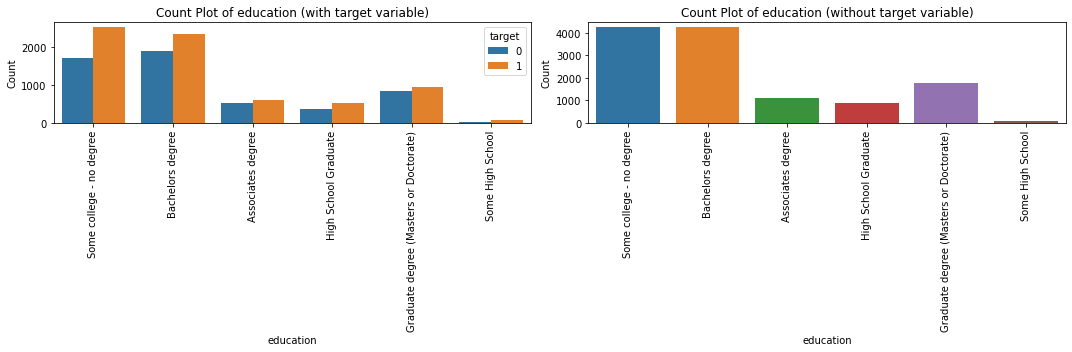

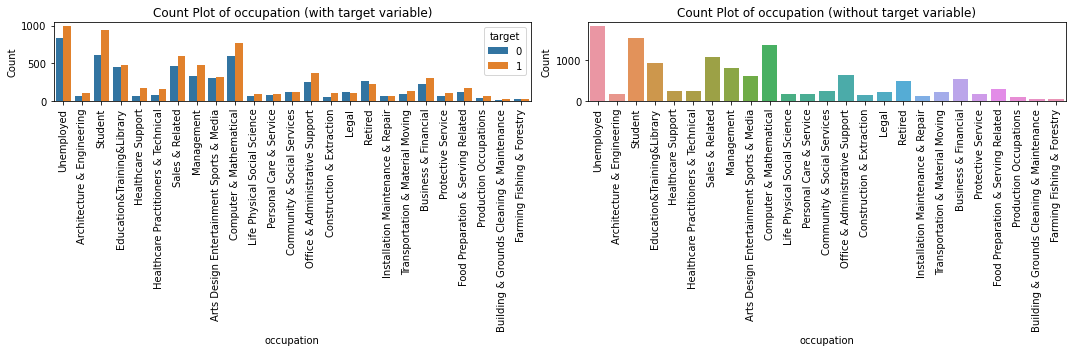

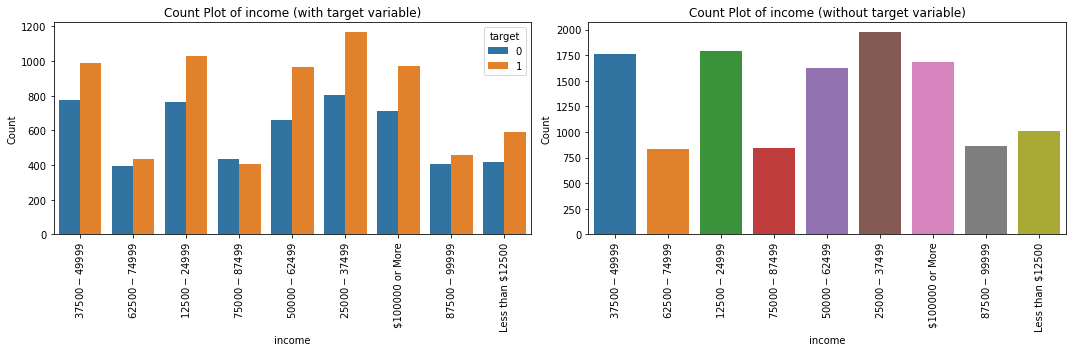

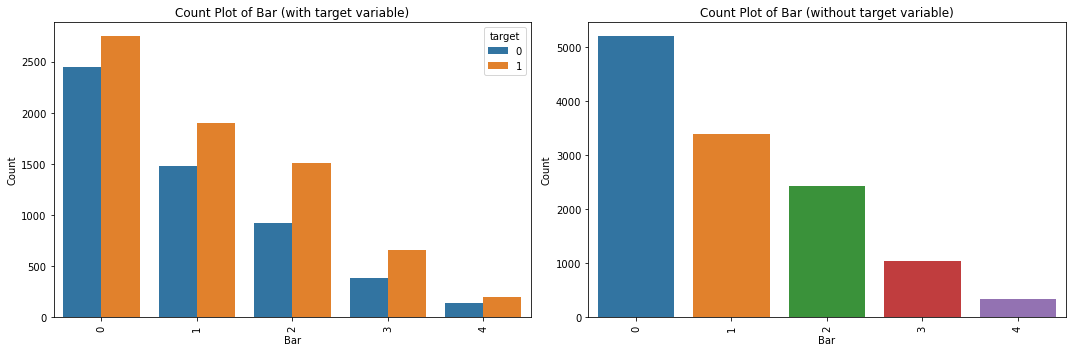

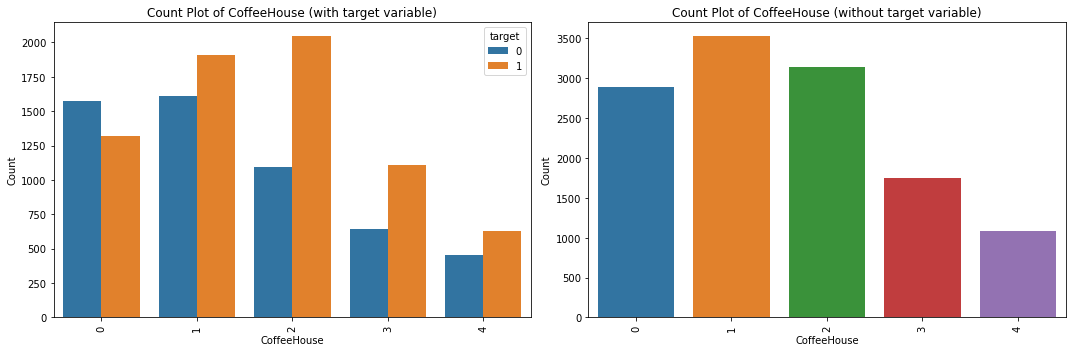

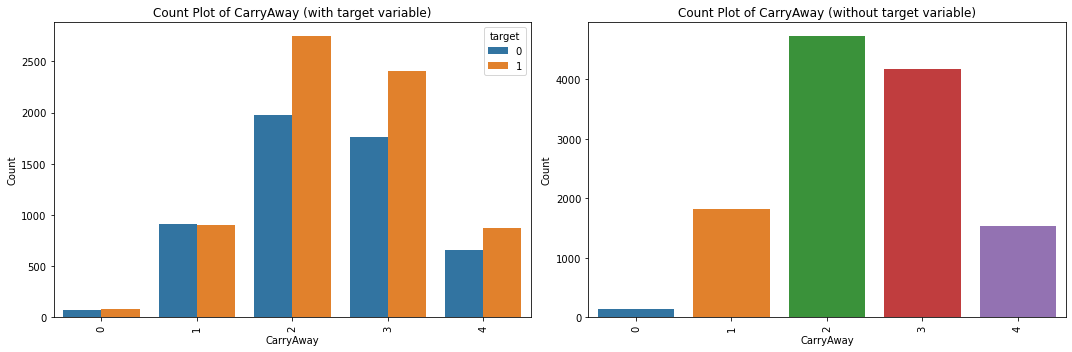

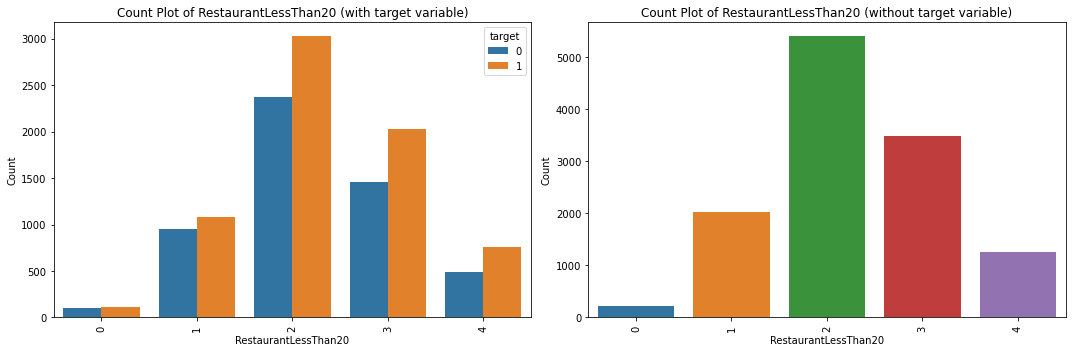

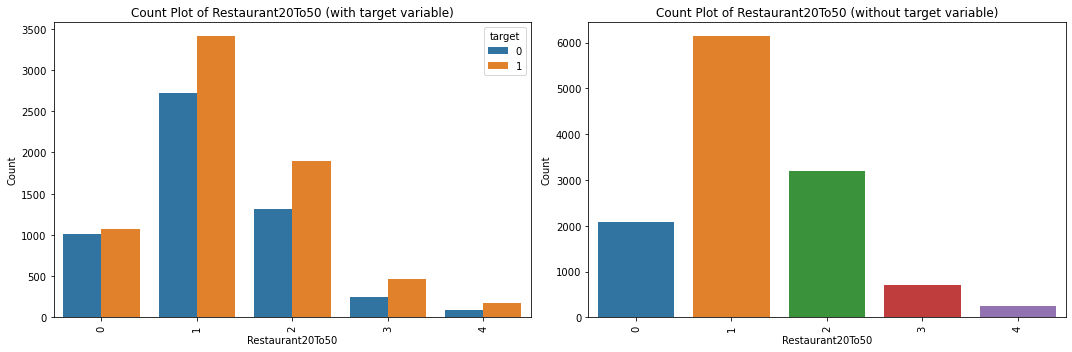

In [52]:
for feature in categorical_col:
   
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))


    sns.countplot(data=data, x=feature, hue='target', ax=ax[0])
    ax[0].set_title(f"Count Plot of {feature} (with target variable)")
    ax[0].set_xlabel(f"{feature}")
    ax[0].set_ylabel("Count")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90) 
    sns.countplot(data=data, x=feature, ax=ax[1])
    ax[1].set_title(f"Count Plot of {feature} (without target variable)")
    ax[1].set_xlabel(f"{feature}")
    ax[1].set_ylabel("Count")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90) 


    plt.tight_layout()
    plt.show()
  

When temperature is on higher side -- then coupon acceptance is more. But here note that temperature value is mostly high in our data. Probably most of the survey takers lived in hot areas

People have 24hr before coupon expires -- then coupon acceptance is more. Also here since both are in same propotion therefore it is good for us as it will not create bias for coupon type

Most people prefer to go to Coffee House and cheap restaurants. But cheap restaurant and take away have highest acceptance rate, we aren't sure about coffee house. For Bar and expensive Restaurant people mostly reject their Coupon. But it is intersting to note that people who have never visited bar likely accept the coupon whereas people who have never visited coffeehouse reject the coupon
For expensive restaurants people are generally not accepting coupons. Only who visit expensive restaurants more frequently are more likely to accept the coupons

most coupons are accepted by single people followed by married partner.

Most people are in age 21-31. Probably because adults are mostly outgoing  and younger people aren't allowed to drive 

Highest frequency of users are either who is pursuing college or have bachelors degree. These will be top 2 most frequent.

People who have no urgent place to visit are more likely to accept the coupon. whereas if they are going to hom or work there is 50-50 chance

Acceptance of coupon in male is slightly higher

People are accepting coupon more if they are driving with friends

If it is sunny they are more likely to accept the coupon.

People from each occupation seem to be accepting coupons frequently. But it is interesting to see that Students are having highest accepting rate.


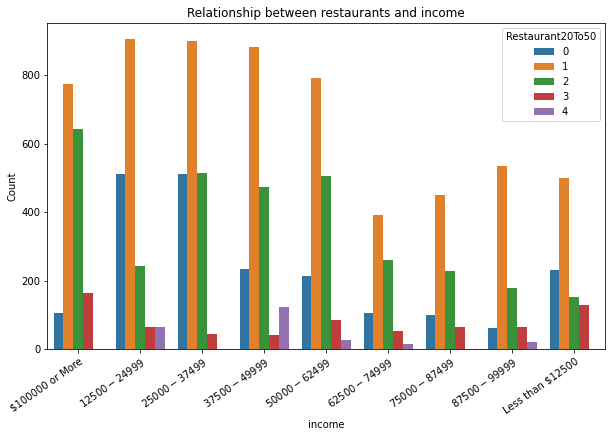

In [53]:
temp = pd.DataFrame(data.groupby(['income','Restaurant20To50']).size()).reset_index()
temp.columns = ['income','Restaurant20To50','count']

# plotting
plt.figure(figsize=(10,6))
sns.barplot(x='income',y='count',hue='Restaurant20To50',data=temp)
plt.xticks(rotation = 35,rotation_mode = "anchor",ha = "right")
plt.ylabel("Count")
plt.title("Relationship between restaurants and income")
plt.show()

People earning more than $100k are more likely to visit 1-3 times compared to others.But also its interesting to notice that irrespective of salary people people visit expensive restaurant.

<AxesSubplot:xlabel='target', ylabel='passanger'>

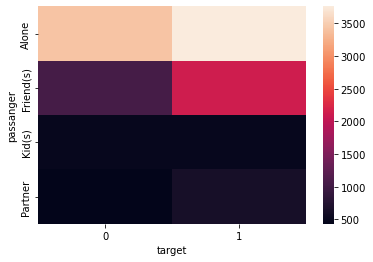

In [54]:
sns.heatmap(pd.crosstab(data['passanger'],data['target']))

In [55]:
temp = data.copy()

In [56]:
def comparison(var1,var2):
    temp['feature_comb'] = temp[var1].astype('str') + ' & ' + temp[var2].astype('str')
    sns.countplot(x='feature_comb',hue='target',data=temp)
    plt.xlabel("{} & {}".format(var1,var2))
    plt.xticks(rotation = 35,rotation_mode = "anchor",ha = "right")
    plt.show
    


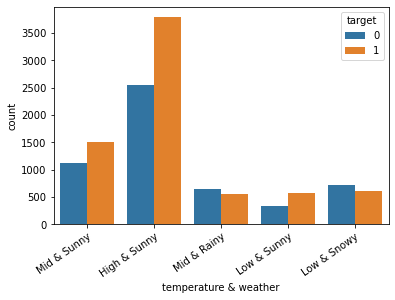

In [57]:
 comparison('temperature','weather')

people are accepting more coupons if overall climate is on higher side

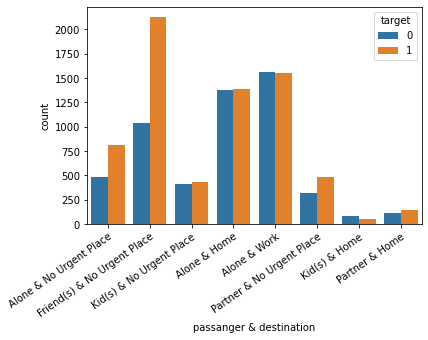

In [58]:

comparison('passanger','destination')

People who are with freinds and have no urgent place to visit are more likely to accept the coupon

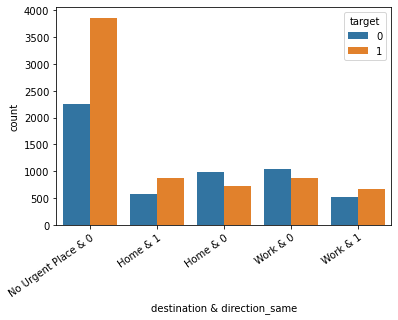

In [59]:
comparison('destination','direction_same')

If there is no urgent place and are going in opposite direction then they are most likely to accept the coupon
Also if they are in same direction and going to home and work they are more likely to accept the coupon when compared to opposite direction

In [60]:
def distance(lst):
    x, y,z = lst
    if x ==1:
        if y ==1:
            if z ==1:
                return 'withing 25 mins'
            else:
                return 'withing 15 mins'
        else:
            return 'within 5 mins'
 


In [61]:
data['distance'] = data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].apply(distance, axis = 1)

We created new column distance which is combination of 'toCoupon_GEQ15min','toCoupon_GEQ25min'. So we will drop these 2 columns

<AxesSubplot:xlabel='distance', ylabel='count'>

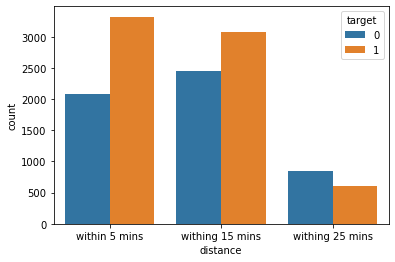

In [62]:
sns.countplot(data = data, x = data['distance'], hue = 'target')

People are more likely to accept coupon if they are close to the venue

In [63]:
temp = data.copy()


we also saw most coupons are distributed for coffee house let's deep dive into that.
So here we can see if venue is coffee house and visiting with friends which is nearby then it is most likely to accept the coupon 
Also intresting to note people like to go to coffee house alone but they are mostly rejecting coupon

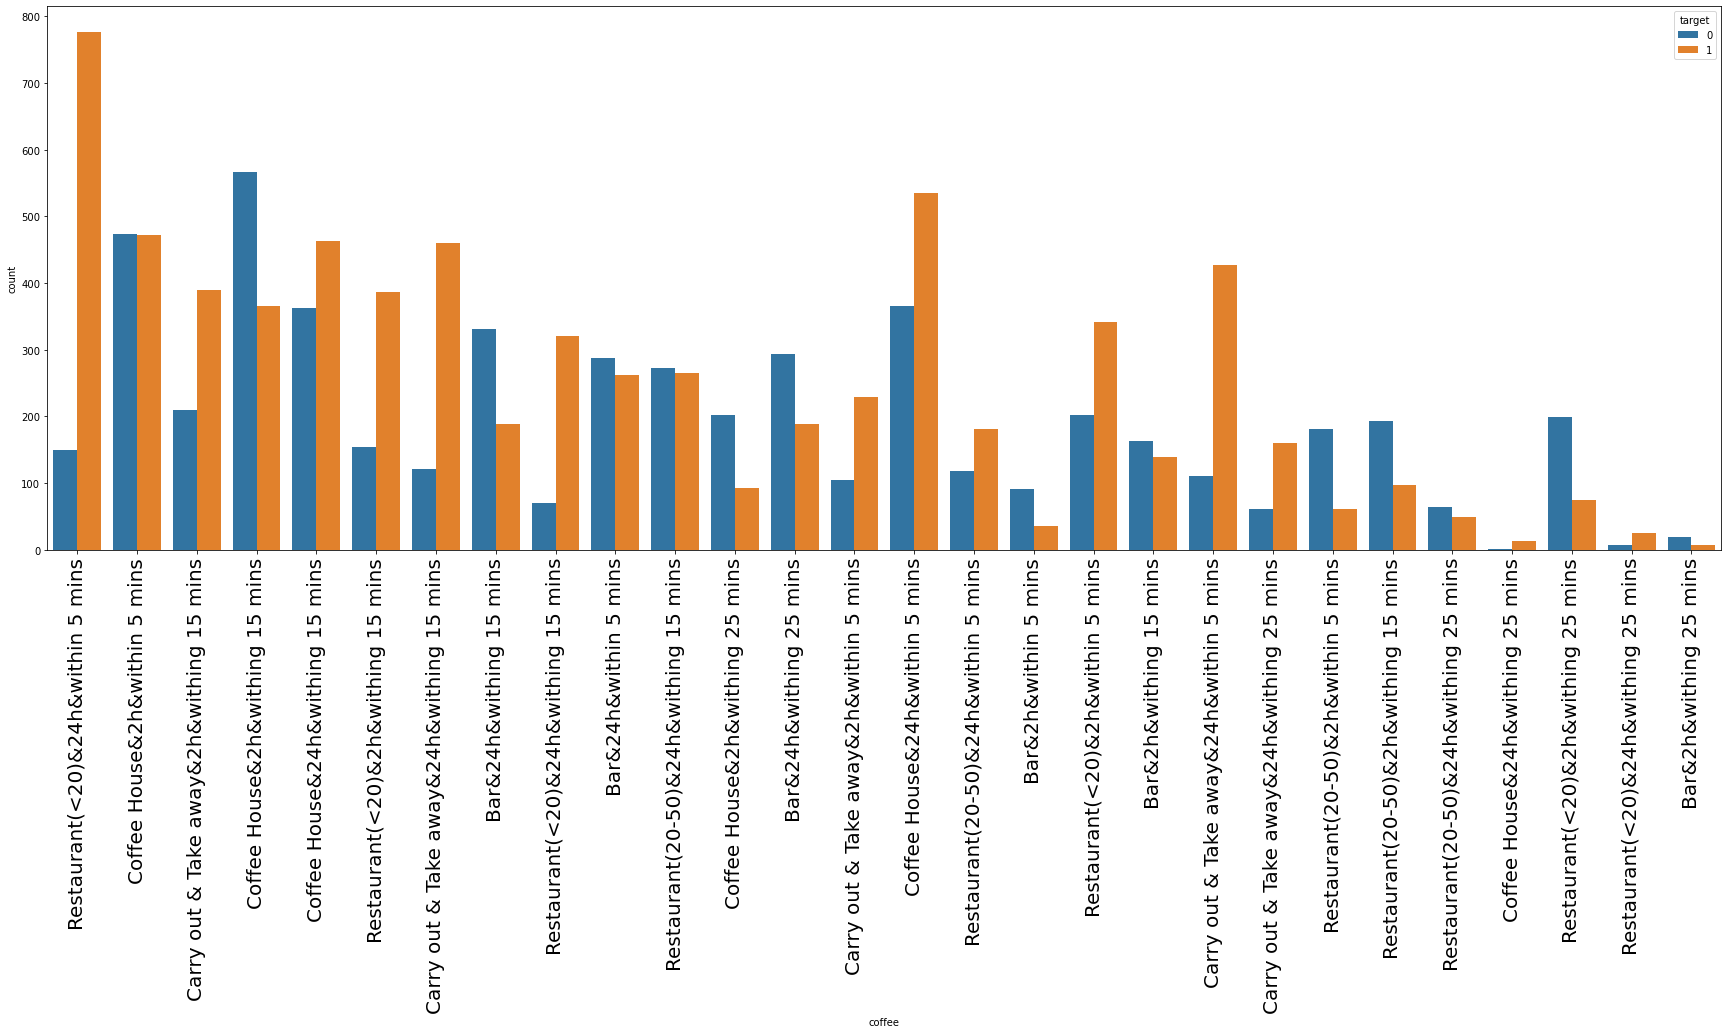

In [64]:
plt.figure(figsize = (30,10))
temp['coffee'] = temp['coupon'] + '&' + temp['expiration']+'&' + temp['distance']

sns.countplot(data= temp, x = 'coffee', hue = 'target')
plt.xticks(rotation = 90, size = 20)
plt.show()

We can see if expiration time is decreasing and person is far from venue then rejection rate is more for cheap restaurants
people visitng Bars are mostly rejecting 
We see though the distance is less for expensive restaurants but still rejection rate is high if expiration time is decreasing. So here what we can do is we can increase the expiration time. Because if we see for coffee houses the distance is less but since expiration time is more therefore people are accepting the coupon

In [65]:
data = data.drop(columns = ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'], axis = 1)
data

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,target,distance
0,No Urgent Place,Alone,Sunny,Mid,Restaurant(<20),24h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,1,within 5 mins
1,No Urgent Place,Friend(s),Sunny,High,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,within 5 mins
2,No Urgent Place,Friend(s),Sunny,High,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,1,withing 15 mins
3,No Urgent Place,Friend(s),Sunny,High,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,withing 15 mins
4,No Urgent Place,Friend(s),Sunny,High,Coffee House,24h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,withing 15 mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,Mid,Carry out & Take away,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,1,1,within 5 mins
12680,Work,Alone,Rainy,Mid,Carry out & Take away,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,0,1,within 5 mins
12681,Work,Alone,Snowy,Low,Coffee House,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,1,0,within 5 mins
12682,Work,Alone,Snowy,Low,Bar,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,0,0,withing 25 mins


In [66]:
X = data.drop('target', axis = 1)
y = data['target']

object_df = X.select_dtypes(include='object')

dummy_df1 = pd.get_dummies(object_df)
obj_cols = object_df.columns
non_obj_df = X.iloc[:, ~X.columns.isin(obj_cols)]
dummy_df2 = pd.get_dummies(non_obj_df.astype('object'))

X = pd.concat([dummy_df1,dummy_df2], axis=1)

In [67]:
#data.to_csv('./preprocessed.csv', index=False)

In [68]:
data

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,target,distance
0,No Urgent Place,Alone,Sunny,Mid,Restaurant(<20),24h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,1,within 5 mins
1,No Urgent Place,Friend(s),Sunny,High,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,within 5 mins
2,No Urgent Place,Friend(s),Sunny,High,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,1,withing 15 mins
3,No Urgent Place,Friend(s),Sunny,High,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,withing 15 mins
4,No Urgent Place,Friend(s),Sunny,High,Coffee House,24h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,0,0,2,3,2,0,0,withing 15 mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,Mid,Carry out & Take away,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,1,1,within 5 mins
12680,Work,Alone,Rainy,Mid,Carry out & Take away,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,0,1,within 5 mins
12681,Work,Alone,Snowy,Low,Coffee House,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,1,0,within 5 mins
12682,Work,Alone,Snowy,Low,Bar,24h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,0,0,2,3,2,0,0,withing 25 mins


In [69]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

# Train Test SPlit

In [70]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [71]:
for ele in [X_train, X_test, y_train, y_test]:
    ele.reset_index(inplace=True,drop=True)

# Logistic Regression

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.57      0.62      1110
           1       0.69      0.78      0.73      1369

    accuracy                           0.69      2479
   macro avg       0.68      0.67      0.68      2479
weighted avg       0.68      0.69      0.68      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6853569987898346
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

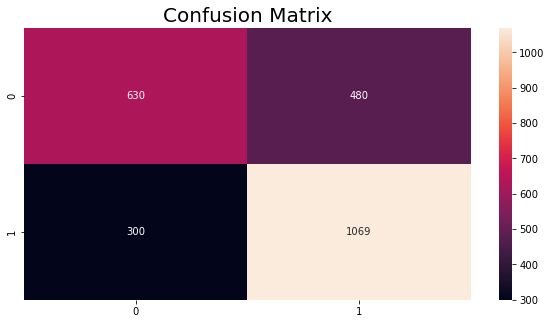

In [72]:
lr = LogisticRegression(max_iter = 3000)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

According to the classification report above, f1-score  is 0.74. This means that the logistic regression do better on predicting.But The accuracy is 0.69, which is quite low.

# DecisionTree

In [161]:

dt = DecisionTreeClassifier()
dt.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [162]:
 param_grid = { 'criterion':['gini','entropy'],'max_depth': [1,2,3, 4, 5, 6,7,8, 10, 15]}

dtree_model=DecisionTreeClassifier()
search = GridSearchCV(dtree_model, param_grid=param_grid, cv=5 )
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]})

In [163]:
print ("Best score is: ",search.best_score_)
print ("Best parameters are: ",search.best_params_)
print ("Best estimator is: ", search.best_estimator_)

Best score is:  0.6870082889220329
Best parameters are:  {'criterion': 'gini', 'max_depth': 6}
Best estimator is:  DecisionTreeClassifier(max_depth=6)


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.56      0.61      1110
           1       0.69      0.78      0.73      1369

    accuracy                           0.68      2479
   macro avg       0.68      0.67      0.67      2479
weighted avg       0.68      0.68      0.68      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6809197256958451
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

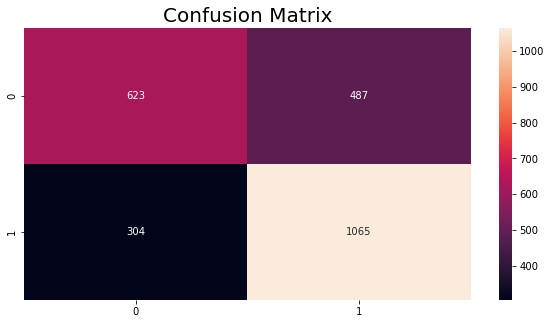

In [73]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=8)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# KNN

In [165]:
knn = KNeighborsClassifier()

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {'n_neighbors': [3,4,5,6,7,8,10,11,12,13,14,15,17],
              'weights': ['uniform', 'distance'] ,
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p':[1,2]}
knn_grid_cv = GridSearchCV(knn, 
                           param_grid, 
                           scoring = 'f1',
                           cv=5, 
                           n_jobs=-1)
knn_grid_cv.fit(X_train,y_train)

In [ ]:
print ("Best score is: ",knn_grid_cv.best_score_)
print ("Best parameters are: ",knn_grid_cv.best_params_)
print ("Best estimator is: ", knn_grid_cv.best_estimator_)
     

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.53      0.60      1110
           1       0.68      0.80      0.73      1369

    accuracy                           0.68      2479
   macro avg       0.68      0.66      0.66      2479
weighted avg       0.68      0.68      0.67      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6776926179911255
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

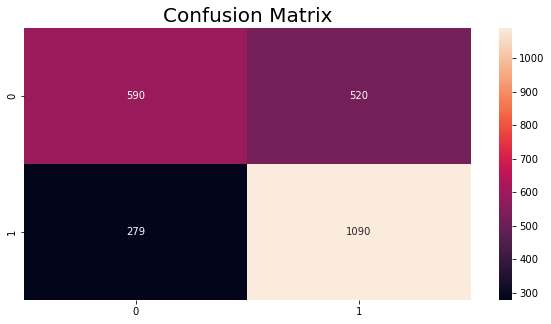

In [74]:

knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=17, p=1, weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)


# SVM

In [168]:

svc = SVC()
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma':['scale', 'auto']
               }
svc_grid_cv = GridSearchCV(svc, 
                           param_grid,
                           scoring = 'f1',
                           cv=5,
                           n_jobs=-1)
     
svc_grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [169]:
print ("Best score is: ",svc_grid_cv.best_score_)
print ("Best parameters are: ",svc_grid_cv.best_params_)
print ("Best estimator is: ", svc_grid_cv.best_estimator_)


Best score is:  0.7718434134294337
Best parameters are:  {'gamma': 'auto', 'kernel': 'poly'}
Best estimator is:  SVC(gamma='auto', kernel='poly')


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1110
           1       0.90      0.95      0.93      1369

    accuracy                           0.92      2479
   macro avg       0.92      0.91      0.91      2479
weighted avg       0.92      0.92      0.92      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9164985881403792
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

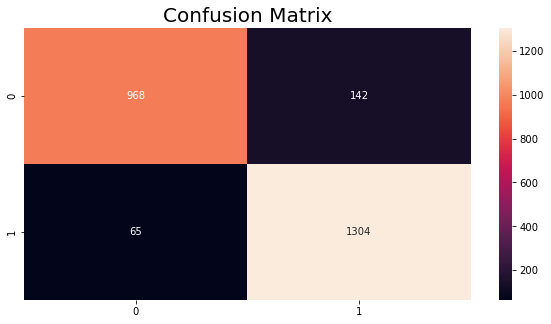

In [75]:

svc = SVC(gamma='scale',kernel='poly')
svc.fit(X_test,y_test)
y_pred = svc.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)


# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.get_params().keys()

In [ ]:

param_grid = { 
    'n_estimators': [10, 50, 100, 150, 300],
    
    'criterion' :['gini', 'entropy']
}
RF_grid_cv = GridSearchCV(rf, 
                          param_grid, 
                         
                          cv=5)
RF_grid_cv.fit(X_train,y_train)


In [ ]:
print ("Best score is: ",RF_grid_cv.best_score_)
print ("Best parameters are: ",RF_grid_cv.best_params_)
print ("Best estimator is: ", RF_grid_cv.best_estimator_)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1110
           1       0.75      0.83      0.79      1369

    accuracy                           0.75      2479
   macro avg       0.75      0.75      0.75      2479
weighted avg       0.75      0.75      0.75      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.7535296490520371
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

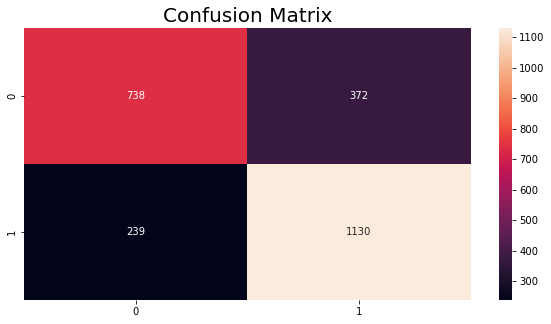

In [76]:
rf = RandomForestClassifier(criterion='entropy',
                            n_estimators = 300,
                            random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Classification Report: \n", classification_report(y_test, y_pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

# Gradient Boosting

In [ ]:

GBC =GradientBoostingClassifier()
GBC.get_params().keys()

In [ ]:
param_grid = {'learning_rate':[0.09, 0.10,0.11,0.12], 
              'n_estimators':[100, 120, 140 ,160],
              
              }

GBC_gird_cv = GridSearchCV(GBC, 
                           param_grid,
                           scoring = 'f1',
                           cv=5,
                           n_jobs=-1)
GBC_gird_cv.fit(X_train,y_train)

In [ ]:
print ("Best score is: ",GBC_gird_cv.best_score_)
print ("Best parameters are: ",GBC_gird_cv.best_params_)
print ("Best estimator is: ", GBC_gird_cv.best_estimator_)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      1110
           1       0.76      0.81      0.78      1369

    accuracy                           0.75      2479
   macro avg       0.75      0.75      0.75      2479
weighted avg       0.75      0.75      0.75      2479

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.7523194836627672
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


Text(0.5, 1.0, 'Confusion Matrix')

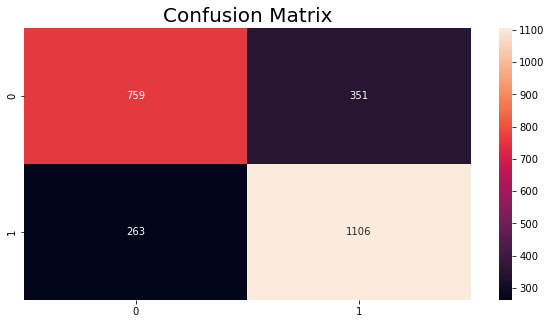

In [77]:

GBC =GradientBoostingClassifier(learning_rate=0.1, max_depth=8, n_estimators=160)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("-" * 100)
print()    
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("-" * 100)
print()
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)

In [78]:
models = [dt,knn,rf,svc,GBC]
models_name = ['Decision Tree',  'K-Nearest Neighbors', 'Random Forest','Support Vector Classifer', 'Gradient Boosting' ]
print('Classification Report')
print()

for i, model in enumerate(models):
  y_pred = model.predict(X_test)
  print(models_name[i])
  print('-----------------------------------------------------')
  print(classification_report(y_test,y_pred))
  print()

Classification Report

Decision Tree
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1110
           1       0.69      0.78      0.73      1369

    accuracy                           0.68      2479
   macro avg       0.68      0.67      0.67      2479
weighted avg       0.68      0.68      0.68      2479


K-Nearest Neighbors
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.53      0.60      1110
           1       0.68      0.80      0.73      1369

    accuracy                           0.68      2479
   macro avg       0.68      0.66      0.66      2479
weighted avg       0.68      0.68      0.67      2479


Random Forest
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1110
  

We can see clearly that SVC is performing really well on all performance metrics. Also we see all model are behaving well in case of label 1 than label 0 meaning all are predicting positive values better
low for label 1 means it is unable to predict negative item very well which is incase of random forest and knn the least among all.



SVC is the model we will move ahead as its accuracy is 85% which is really very good for us.Not only this along with F1 score, it also works really well in predicting negative item very well


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be r

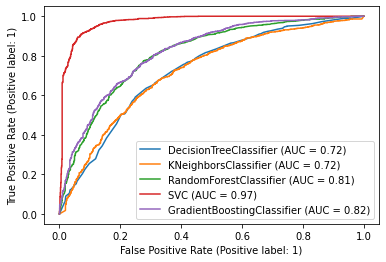

In [79]:
ax = plt.gca()
for i, model in enumerate(models):
  fig = plot_roc_curve(model, X_test,y_test,ax=ax)
plt.show()

In [81]:
scores = []
for model in models:
  score = roc_auc_score(y_test, model.predict(X_test))
  scores.append(score)

In [82]:
score_df = pd.DataFrame({'model': models_name, 'ROC-AUC Score':scores})
score_df

,model,ROC-AUC Score
0,Decision Tree,0.669601
1,K-Nearest Neighbors,0.663867
2,Random Forest,0.745142
3,Support Vector Classifer,0.912296
4,Gradient Boosting,0.745836


In [1]:
a= 'hello'

for i in a:
    
     

SyntaxError: 'return' outside function (Temp/ipykernel_22608/3666239246.py, line 4)

Clearly with this we came to conclusion to use SVC 
